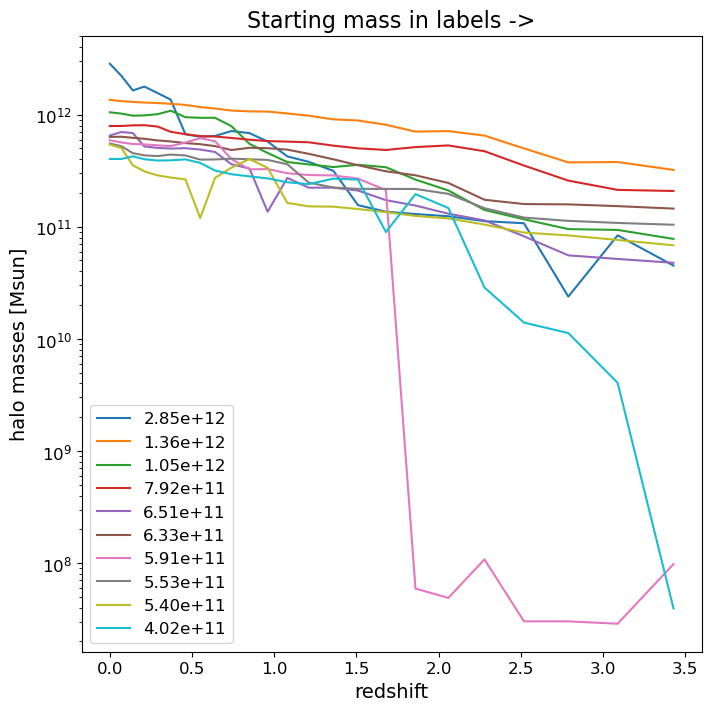

In [5]:
from shared.preface import *
import shared.functions as fct

# sim_ID = 'L006N188'
sim_ID = 'L012N376'

# Path to merger_tree file (has to have been generated with merger_tree.py)
tree_path = f'{pathlib.Path.cwd().parent}/neutrino_clustering_output_local/MergerTree/MergerTree_{sim_ID}.hdf5'

with h5py.File(tree_path) as tree:
    Masses = tree['Assembly_history/Mass'][:10,:]
    zeds = tree['Assembly_history/Redshift']
    
    masses = np.asarray(Masses)
    z = np.asarray(zeds)

    fig = plt.figure()

    for m in masses:
        plt.semilogy(z, m, label=f'{m[0]:.2e}')

    plt.title(u'Starting mass in labels ->')
    plt.xlabel('redshift')
    plt.ylabel('halo masses [Msun]')
    plt.legend()
    plt.show()

In [ ]:
for s in NUMS_SNAPSHOTS[3:]:
    g = np.load(
        f'CubeSpace/fin_grid_L006N188_snapshot_{s}_1.89e+12Msun_800.0kpc.npy'
    )
    c = np.load(
        f'CubeSpace/DM_count_L006N188_snapshot_{s}_1.89e+12Msun_800.0kpc.npy'
    )
    
    print(g.shape, c.sum())

### Snippets for cell division function.

In [ ]:
parent_GRID_S = GRID_S
sub8_GRID_S = parent_GRID_S/2.
sub8_raw = fct.grid_3D(sub8_GRID_S, sub8_GRID_S)
# print(sub8_raw/kpc)

pcs = 5  # amount of parent cells
sub8_temp = np.tile(sub8_raw, (pcs,1)).reshape((pcs, 8, 3))
# print(sub8_temp/kpc, sub8_temp.shape)

parent_cc = np.zeros((pcs,1,3))
parent_cc[1,...] += 2
parent_cc[4,...] += 2
parent_cc *= kpc
print(parent_cc/kpc)

sub8_coords = np.reshape(sub8_temp + parent_cc, (pcs*8, 1, 3))
print(sub8_coords/kpc)

In [ ]:
DM_count = np.zeros(len(parent_cc))
DM_count[[1,3]] += 1
trimmed_cc = np.delete(parent_cc, np.s_[DM_count==0], axis=0)
print(trimmed_cc)

In [ ]:
rand_DM = np.random.random((2,4,3))
rand_DM[:,3:,:] = np.nan
# print(rand_DM)

DM_re = rand_DM.reshape((2*4,3))
DM_sort = np.sort(DM_re, axis=0)
# print(DM_sort)

max_row = np.count_nonzero(~np.isnan(DM_sort[:,0]))
# print(max_row)

DM_trunc = np.delete(DM_sort, np.s_[max_row:], axis=0)

# print(DM_trunc)

DM_unique = np.unique(DM_trunc, axis=1)
# print(DM_unique)

len1 = len(DM_unique)
len2 = len(DM_trunc)
print(len1==len2)

In [ ]:
DM_nonan = DM_reset[~np.isnan(DM_reset)]
print(DM_nonan.shape)

len1 = len(np.unique(DM_nonan.flatten()))
len2 = len(DM_nonan.flatten())
print(len1==len2, len1, len2)

In [ ]:
DM_pos = np.random.randint(-10, 10, (2,5,3))
DM_pos = np.asarray(DM_pos, dtype=np.float64)
DM_pos[:,1:3,:] = np.nan
print(DM_pos)

ind_2D = DM_pos[:,:,0].argsort(axis=1)
ind_3D = np.repeat(np.expand_dims(ind_2D, axis=2), 3, axis=2)

DM_pos_sort = np.take_along_axis(DM_pos, ind_3D, axis=1)
print(DM_pos_sort)

In [ ]:
parts = np.random.randint(-10, 10, (2,5,3))

print(parts)

cell_len = np.ones((len(parts),1))*7
print(cell_len.shape)
cell_len[0] = 5

parts_in = np.asarray(
    (np.abs(parts[:,:,0]) <= cell_len) &
    (np.abs(parts[:,:,1]) <= cell_len) &
    (np.abs(parts[:,:,2]) <= cell_len)
)

print(parts_in)

parts = np.asarray(parts, dtype=np.float64)

parts[~parts_in] = np.nan

print(parts)

### Output of cell disvision.

In [ ]:
fin_grid = np.load('CubeSpace/fin_grid_L006N188_snapshot_0036.npy')
DM_raw = np.load(
    'CubeSpace/DM_positions_L006N188_snapshot_0036_2.59e+11Msun.npy')
DM_count = np.load('CubeSpace/DM_count_L006N188_snapshot_0036.npy')
cell_com = np.load('CubeSpace/cell_com_L006N188_snapshot_0036.npy')
cell_gen = np.load('CubeSpace/cell_gen_L006N188_snapshot_0036.npy')

print(fin_grid.shape, DM_raw.shape, DM_count.shape, cell_com.shape, cell_gen.shape)
print(np.sum(DM_count))
print(type(cell_com.shape[0]))

cell_com_rep = np.repeat(
        np.expand_dims(cell_com, axis=1), fin_grid.shape[0], axis=1
    )
print(cell_com_rep.shape)

### Selecting only certain element for each column of 3D array.

In [ ]:
a = np.zeros((3,3), int)
np.fill_diagonal(a, 1)
print(a)

t0 = np.arange(9).reshape(3,3)
print(t0[~a.astype(dtype=bool)].reshape(3,2))

a = np.repeat(np.expand_dims(a, axis=2), 3, axis=2)
# print(a)

t1 = np.arange(27).reshape(3,3,3)
# print(t1)
print(t1[~a.astype(dtype=bool)].reshape(3,2,3))

## Argparse

Functions that use/make files:
- read_DM_positions
- cell_division
- cell_gravity_3D
- load_grid
- load_u_sim
- load_x_sim

Scripts that use/make files:
- discrete_precalculations_MW.py
- discrete_simulation_MW.py
- merger_tree.py
- smooth_simulation.py

In [ ]:
class NuParser(object):

    input_x: str

    def __init__(self):
        
        parser = argparse.ArgumentParser(
            description="Argument Parser for Neutrino Clustering pipeline."
        )

        parser.add_argument(
            "-x",
            "--long_name_x",
            help="explain what x does",
            type=str,
            required=True
        )

        args = parser.parse_args()

        self.input_x = args.long_name_x


        print("{Parsed arguments:")
        print("---------------------\n")
        print(f"Parameter x: {self.input_x}")


## Tests

### Rearranging 2D array along one axis.

In [ ]:
x2D = np.arange(6).reshape(2,3)
print(x2D)

ind2D = np.array([[1,0,2], [2,1,0]])

ax0 = np.arange(x2D.shape[0])[:,None]

print(ax0.shape, ind2D.shape)

new_x2D = x2D[ax0, ind2D]
print(new_x2D)

### Rearranging 3D array along one axis.

In [ ]:
x3D = np.arange(18).reshape(2,3,3)
print(x3D)
ind3D = np.array([[1,0,2], [2,1,0]])[:,:,None]

ax0 = np.arange(x3D.shape[0])[:,None,None]
ax2 = np.arange(x3D.shape[2])[None,None,:]

new_x3D = x3D[ax0,ind3D,ax2]
print(new_x3D)

### Conversions between momentum to velocity.

In [ ]:
NU_MASSES = np.array([0.01, 0.05, 0.1, 0.3])*eV
Vs = 100
LOWER = 0.01*T_CNB
UPPER = 400*T_CNB

# Momentum range.
MOMENTA = np.geomspace(LOWER, UPPER, Vs)


# Without Lorentz factor.
v_mins = np.zeros(len(NU_MASSES))
v_maxs = np.zeros(len(NU_MASSES))
for i, m_nu in enumerate(NU_MASSES):
    v_km = MOMENTA / m_nu / (m/s)
    v_min, v_max = v_km[0], v_km[-1]
    print(f'(m/s) -> v_min = {v_min:.2f}, v_max = {v_max:.2f}, %c = {v_max/const.c.value*100:.2f} : for {m_nu} eV neutrino')

    v_mins[i] = v_min
    v_maxs[i] = v_max


# for m_nu in NU_MASSES:



# With Lorentz factor.
v_mins = np.zeros(len(NU_MASSES))
v_maxs = np.zeros(len(NU_MASSES))
for m_nu in NU_MASSES:
    v_km = 1/np.sqrt(m_nu**2/MOMENTA**2 + 1) / (m/s)
    v_min, v_max = v_km[0], v_km[-1]
    print(f'(m/s) -> v_min = {v_min:.2f}, v_max = {v_max:.2f}, %c = {v_max/const.c.value*100:.2f} : for {m_nu} eV neutrino')


#! Since the sim is using 0.3 eV mass, the max. velocity present in the sim is 
#! ~20% of c, not the ~98% of the 0.01 eV neutrino (see output of cell).


# Back to momentum to check formulas & functions.


### Coordinates of Andromeda (AG) and the Virgo Cluster (VC).

In [ ]:
# Cross-check with values in Mertsch et al. (2020).
# -> x and y coords. are switched, since our setup is different,
# and my x (their y) coords. differ by 8.5 kpc due to placement of sun
# on our x-axis.
coords_VC = fct.halo_pos(GLAT_VC, GLON_VC, DIST_VC/kpc)
print(coords_VC, 'in kpc')
coords_AG = fct.halo_pos(GLAT_AG, GLON_AG, DIST_AG/kpc)
print(coords_AG, 'in kpc')

### Values in Table 1 of Mertsch et al. (2020).

In [ ]:
Rvir_Tab1 = fct.R_vir_fct(0, Mvir_MW)
print(Rvir_Tab1/kpc)
c_vir_Tab1 = fct.c_vir(0, Mvir_MW, Rvir_MW, Rs_MW)
Rs_Tab1 = Rvir_Tab1 / c_vir_Tab1
print(Rs_Tab1/kpc)

### Critical density of universe.

In [ ]:
rho_crit_today = fct.rho_crit(0)
print(f'{rho_crit_today*(Msun/kpc**3)/(kg/m**3):.2e} kg/m^3') 

### Time Variable s(z) and comparison to age of universe.

In [ ]:
# In s_of_z function we use
H0_mod = H0/ (1/s)
print(H0_mod)

test_z = 1
s_val = fct.s_of_z(test_z)
print(f'Value of time variable s in seconds at redhshift {test_z}:','\n', s_val)
print(
    'Age of universe comparison: \n', 
    f'"Observed/measured": {t0/s:.2e}, i.e. {t0/Gyr:.2f} Gyr \n', 
    f'What we use in s_of_z function: {1/H0/s:.2e}, i.e. {1/H0/Gyr:.2f} Gyr'
)

### Integrals for cosmic time.

In [ ]:
def t_integrand_a(a):

    # We need value of H0 in units of 1/s.
    H0_val = H0/(1/s)

    a_dot = np.sqrt(Omega_M/a**3 + Omega_L)*H0_val*a
    t_int = 1./a_dot

    return t_int

t, err = quad(t_integrand_a, 0, 1)
t_uni, err_uni = t, err
print(t_uni*s/Gyr, err_uni*s/Gyr)

In [ ]:
def t_integrand_z(z):

    # We need value of H0 in units of 1/s.
    H0_val = H0/(1/s)

    a_dot = np.sqrt(Omega_M*(1.+z)**3 + Omega_L)*H0_val*(1.+z)
    t_int = 1./a_dot

    return t_int

t, err = quad(t_integrand_z, 0, np.inf)
t_uni, err_uni = t, err
print(t_uni*s/Gyr, err_uni*s/Gyr)

### Fermi-Dirac distribution.

In [ ]:
p_test_range = np.linspace(0.01, 10)*T_CNB
FD_range = fct.Fermi_Dirac(p_test_range)

plt.loglog(p_test_range/T_CNB, FD_range)
plt.show()

### Redshift array for integration steps.

In [ ]:
# Linear spacing.
# late_steps = 200
# early_steps = 100
# Z_START, Z_STOP, Z_AMOUNT = 0., 4., late_steps+early_steps
# z_late = np.linspace(0,1,late_steps)
# z_early = np.linspace(1.01,4,early_steps)
# ZEDS = np.concatenate((z_late, z_early))

# Logarithmic spacing.
Z_START, Z_STOP, Z_AMOUNT = 0., 4., 300-1  # -1 to compensate np.insert of z=4
Z_START_LOG = 1e-1
zeds_pre = np.geomspace(Z_START_LOG, Z_STOP, Z_AMOUNT) - Z_START_LOG
ZEDS = np.insert(zeds_pre, len(zeds_pre), 4.)

plt.scatter(ZEDS, ZEDS, s=1)
plt.show()
print(ZEDS[0:10], ZEDS[-1])

### Redshift z of each snapshot.

### NFW density profile fct.

In [ ]:
r_range = np.geomspace(1e-3, 100, 100)*kpc
NFW_vals = fct.NFW_profile(r_range, rho0_MW, Rs_MW)
plt.loglog(r_range/kpc, NFW_vals/(GeV/cm**3))

### Typical grav. potential gradient vectors in spher. symmetric simulation.

In [ ]:
z = 0

# For position of Sun/Earth.
x_i = X_SUN*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position of Sun/Earth:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)), '\n')

# For a position closer to the center of the halo.
x_i = np.array([0.01, 0, 0])*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position close to center:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)), '\n')

# For a position further away to the center of the halo.
x_i = np.array([333., 0, 0])*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position at virial radius:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)))

### Test memory sizes

In [ ]:
mem = np.random.random(size=(40000000,3))
print(mem.shape, (mem.nbytes)/1e6)

mem0 = np.empty((40000000,3))
print(mem0.shape, (mem0.nbytes)/1e6)

40 million cells have ~ 1GB memory. There shouldn't be memory issues with the final arrays, especially with the SNELLIUS cluster memory nodes of ~64GB or even ~128GB.